In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from sklearn.metrics import f1_score

In [2]:
train_data = np.load('train_images.npz')

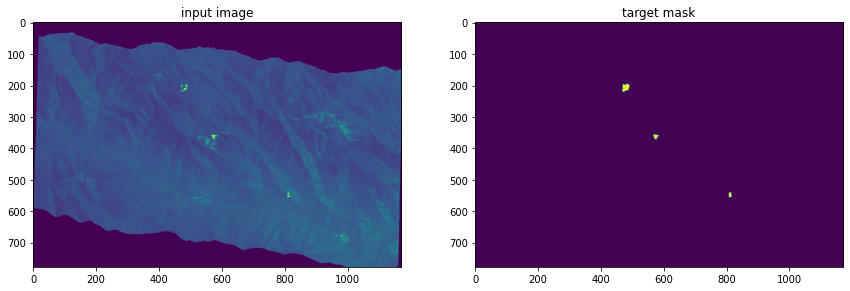

In [14]:
sample = 23# np.random.randint(129)
plt.subplot(121)
plt.imshow(train_data['arr_'+str(sample)][0])
plt.title('input image')

plt.subplot(122)
plt.imshow(train_data['arr_'+str(sample)][1])
plt.title('target mask')
plt.subplots_adjust(top=1.5, right=2)

In [53]:
print('percentage of nulls in input: ',nulls/129*100, '%')

percentage of nulls in input:  3.10077519379845 %


In [10]:
nulls=0
useable = []
for s in range(129):
    nulls+=(train_data['arr_'+str(s)][0].max()<220)
    if train_data['arr_'+str(s)][1].max()>0:
        useable.append('arr_'+str(s))
    

In [42]:
# test rate of threshold:
scores = []
for threshold in tqdm.tqdm(range(150,250,10)):
    scores.append(0)
    for k in useable:
        scores[-1]+= f1_score((train_data[k][0]>threshold).reshape(-1), train_data[k][1].reshape(-1))
scores= np.array(scores)/len(useable)

100%|██████████| 10/10 [16:51<00:00, 101.19s/it]


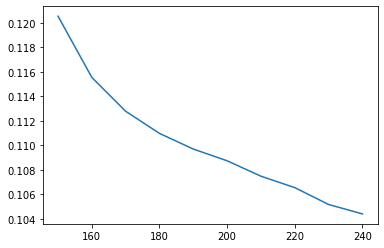

In [44]:
plt.plot(range(150,250,10), scores)

In [27]:
pd.Series(train_data[k][1].reshape(-1)).value_counts()

0    909125
1       742
dtype: int64